In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\SONAI\Desktop\Project\Big_Mart\Big-Mart.csv')
# First Five Observations
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understanding

In [5]:
# Checking shape of the dataset
df.shape

(14204, 12)

In [6]:
# Bsic description of Dataset
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 7 categorical variables
------------------------------------------------------------------------------------------
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [9]:
# Finding numerical variables
numerical_variables = [var for var in df.columns if df[var].dtype!='object']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 5 numerical variables
------------------------------------------------------------------------------------------
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
Item_Outlet_Sales,5681
Outlet_Size,4016
Item_Weight,2439
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0


In [12]:
#Count of unique values in each column  
for var in df.columns:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
NaN       2439
17.600     135
12.150     127
10.500     123
13.650     115
          ... 
7.640        7
5.905        7
7.850        6
4.615        6
9.035        6
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtyp


# Feature Engineering

In [13]:
#checking missing value percentage

print('Missing Values by %:\n\n',
      df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100)

Missing Values by %:

 Item_Outlet_Sales            39.995776
Outlet_Size                  28.273726
Item_Weight                  17.171219
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [14]:
# Replacing null values with the most frequent value in categorical variable
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [15]:
#Replacing null with mean
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [16]:
#Drop null values from Target Variable Item_Outlet_Sales
df.dropna(subset=['Item_Outlet_Sales'], inplace=True)

In [17]:
## Drop rows where 'Item_Visibility' is 0
df = df[df['Item_Visibility'] != 0]

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000
mean,12.862108,0.070482,141.181925,1997.826185,2178.575445
std,4.226929,0.050308,62.201545,8.364645,1704.227930
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.031403,94.109400,1987.000000,829.586800
50%,12.792854,0.057792,143.215400,1999.000000,1794.331000
75%,16.100000,0.098109,185.758200,2004.000000,3098.633200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7997 non-null   object 
 1   Item_Weight                7997 non-null   float64
 2   Item_Fat_Content           7997 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  7997 non-null   object 
 5   Item_MRP                   7997 non-null   float64
 6   Outlet_Identifier          7997 non-null   object 
 7   Outlet_Establishment_Year  7997 non-null   int64  
 8   Outlet_Size                7997 non-null   object 
 9   Outlet_Location_Type       7997 non-null   object 
 10  Outlet_Type                7997 non-null   object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 812.2+ KB


In [20]:
# Verify for null values are removed
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

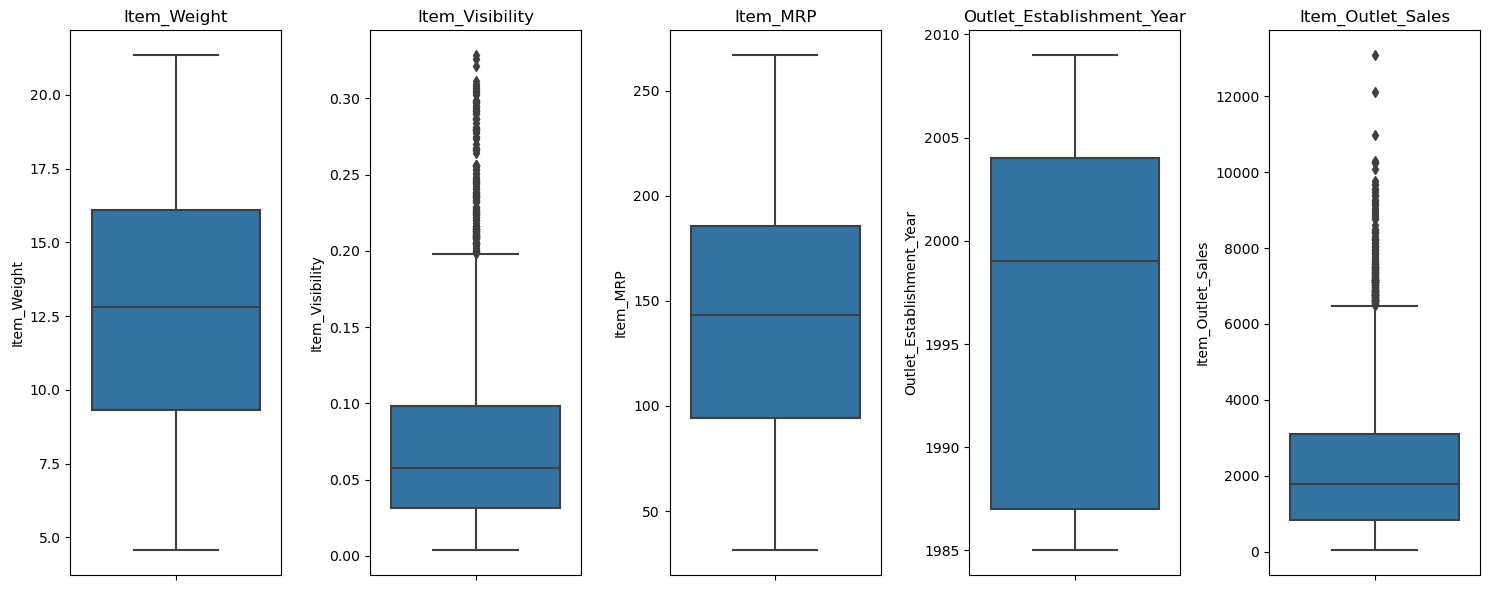

In [21]:
# Box plot to visualizing outliers
fig, axes = plt.subplots(1,(len(numerical_variables)), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
  #  if i<(len(numerical_variables)-1):
        sns.boxplot(y=df[var], ax=axes[i])
        axes[i].set_title(var)
  #  else:
  #      pass
    

plt.tight_layout()
plt.show()

In [22]:
#Replacing outliers by upper limit and lower limit
for var in numerical_variables:
    Q1= df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df.loc[(df[var] > upper_limit),var] = upper_limit
    df.loc[(df[var] < lower_limit),var] = lower_limit

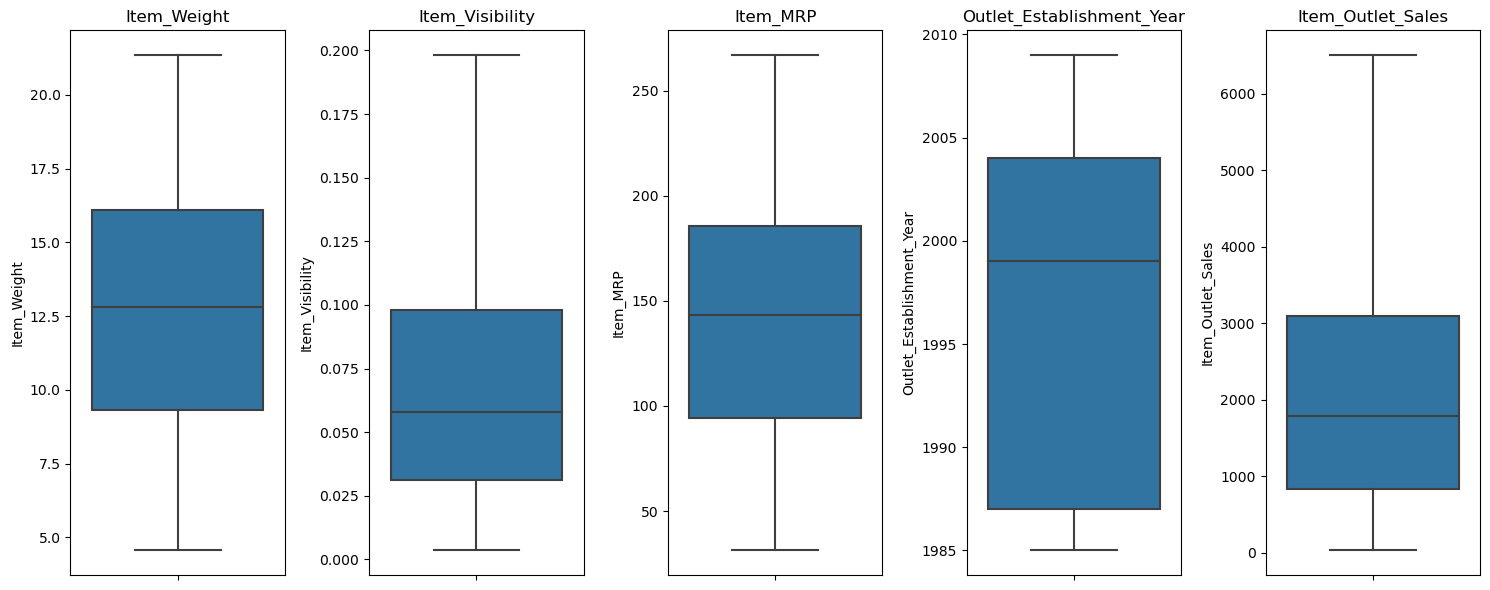

In [23]:
# Box Plot after handing outliers
fig, axes = plt.subplots(1, len(numerical_variables), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

# EDA

In [24]:
#Count of unique values in Categorical column  
for var in categorical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDG33    10
FDW13    10
NCF42     9
NCQ06     9
FDG09     9
         ..
FDE52     1
FDC23     1
FDK57     1
FDQ60     1
FDP15     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    4789
Regular    2708
LF          285
reg         113
low fat     102
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
Fruits and Vegetables    1145
Snack Foods              1132
Household                 859
Frozen Foods              805
Dairy                     644
Canned                    616
Baking Goods              603
Health and Hygiene        487
Soft Drinks               411
Meat                      405
Breads                    234
Hard Drinks               197
Others                    159
Starchy Foods             133
Breakfast                 107
Seafood                    60
Name: Item_Type, dtype: int64
---------

In [25]:
# Replace reapted values in Item_Fat_Content
df['Item_Fat_Content'] = df.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat', 'Regular'])
df.Item_Fat_Content.value_counts()

Low Fat    5176
Regular    2821
Name: Item_Fat_Content, dtype: int64

In [26]:
#Count of unique values in Numerical column  
for var in numerical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

12.792854    1373
17.600000      81
12.150000      77
13.650000      72
11.800000      71
             ... 
5.000000        1
6.520000        1
9.420000        1
7.685000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
0.198167    140
0.076975      3
0.041355      2
0.103442      2
0.037794      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.044878      1
Name: Item_Visibility, Length: 7740, dtype: int64
------------------------------------------------------------------------------------------
196.5768    6
170.5422    6
172.0422    6
142.0154    6
109.5228    6
           ..
254.8040    1
232.3326    1
157.5972    1
108.7912    1
75.4670     1
Name: Item_MRP, Length: 5700, dtype: int64
------------------------------------------------------------------------------------------
1985.0    1373
1999.0     877
2004.0     876
1987.0     873
2

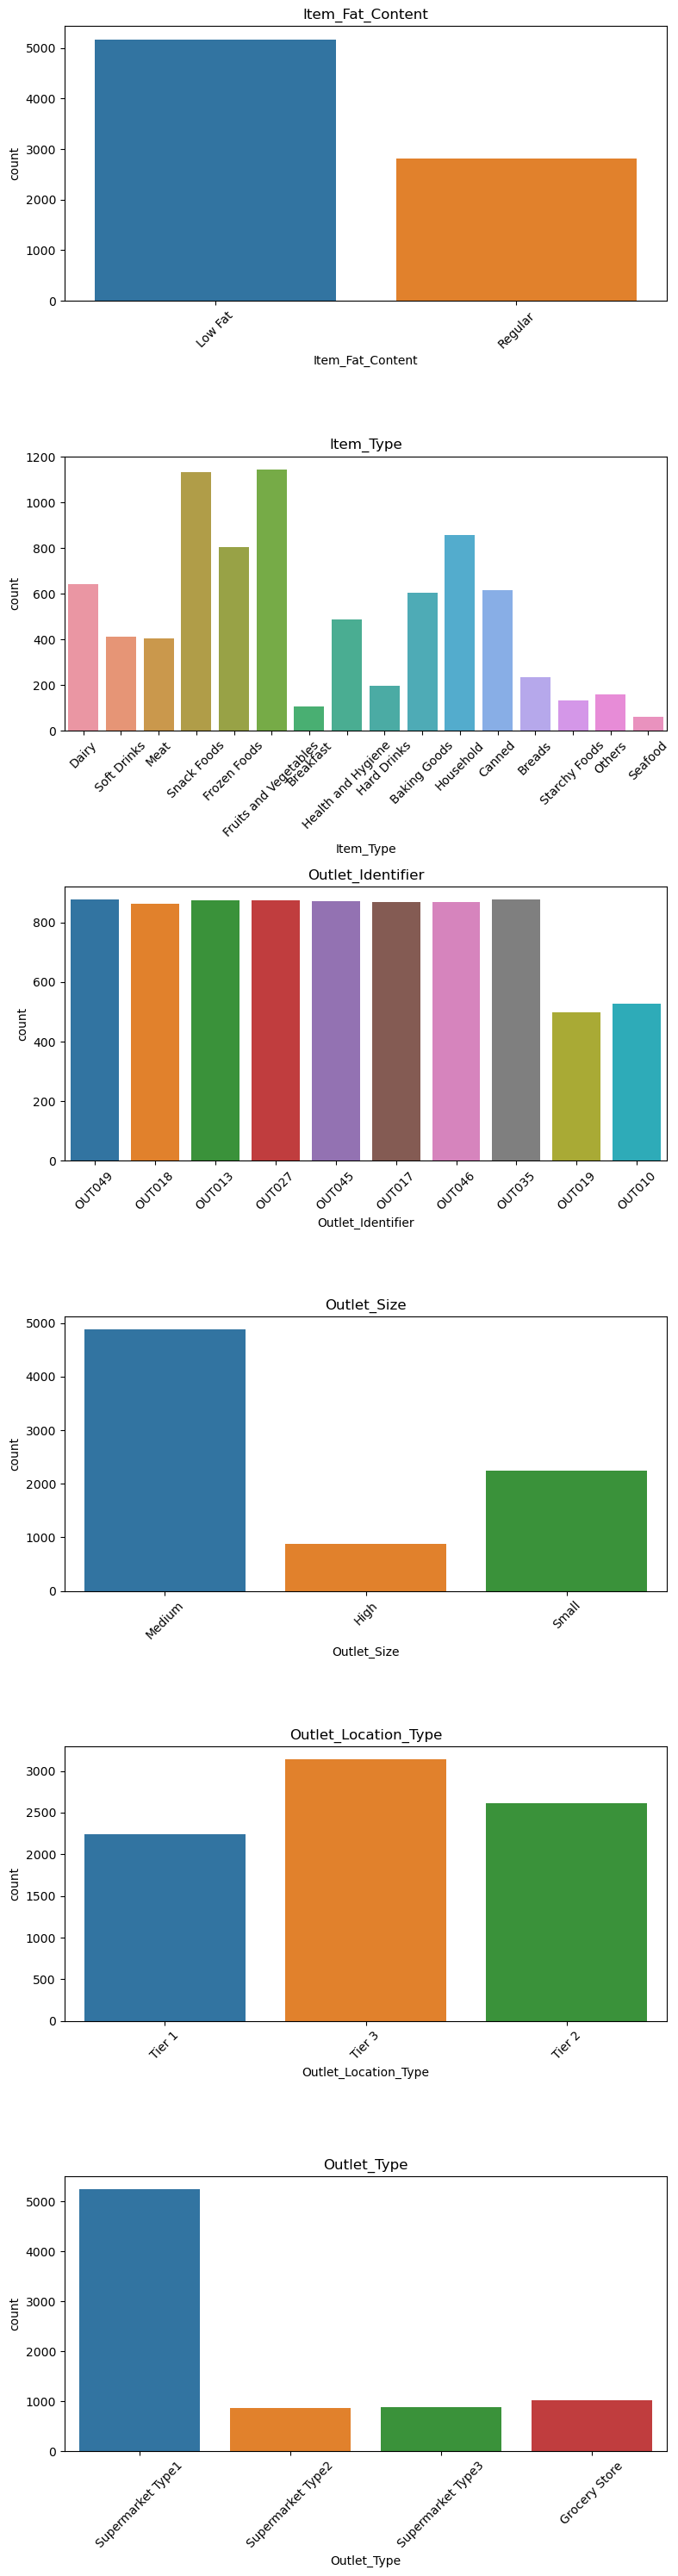

In [27]:
fig, axes = plt.subplots((len(categorical_variables)-1), 1, figsize=(8, 30))
axes = axes.flatten()

for i, var in enumerate(categorical_variables[1:]):
#    if i!=0:
        sns.countplot(data=df, x=var, ax=axes[i])
        axes[i].set_title(var)
        axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

__________________________________________________________________________________________


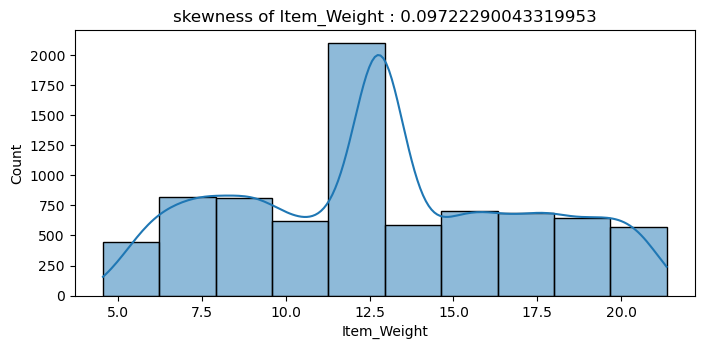

__________________________________________________________________________________________


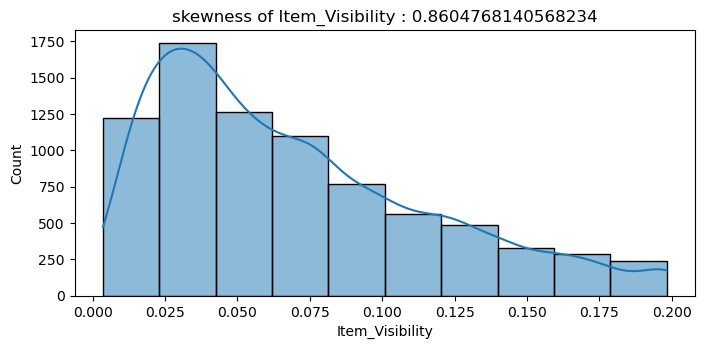

__________________________________________________________________________________________


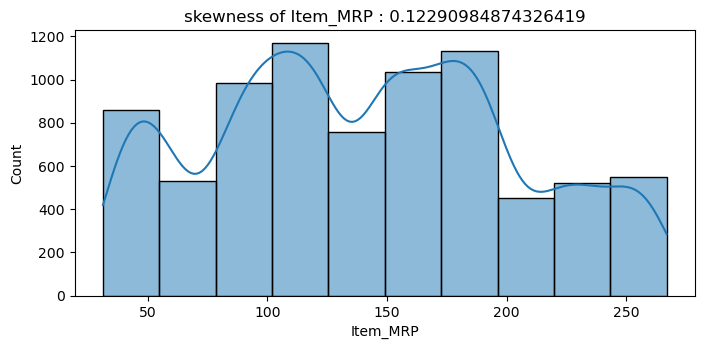

__________________________________________________________________________________________


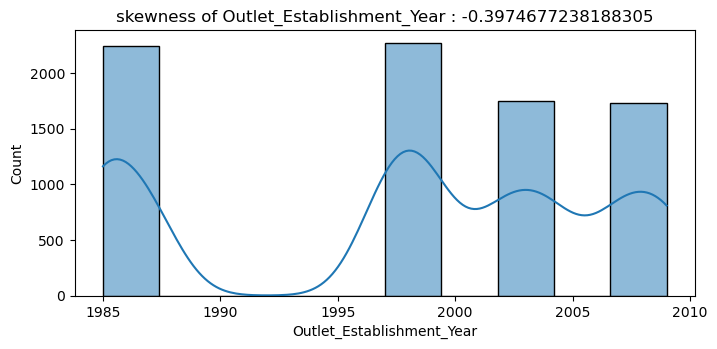

__________________________________________________________________________________________


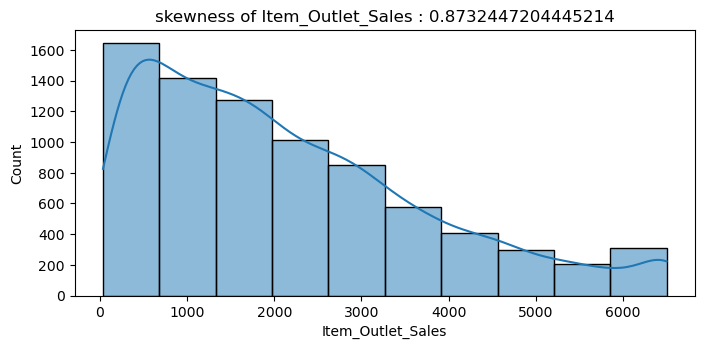

In [28]:
for var in numerical_variables:
    plt.figure(figsize=(8,20))
    plt.subplot(len(numerical_variables),1,1)
    ax=sns.histplot(data=df,x=df[var],kde=True,bins=10)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

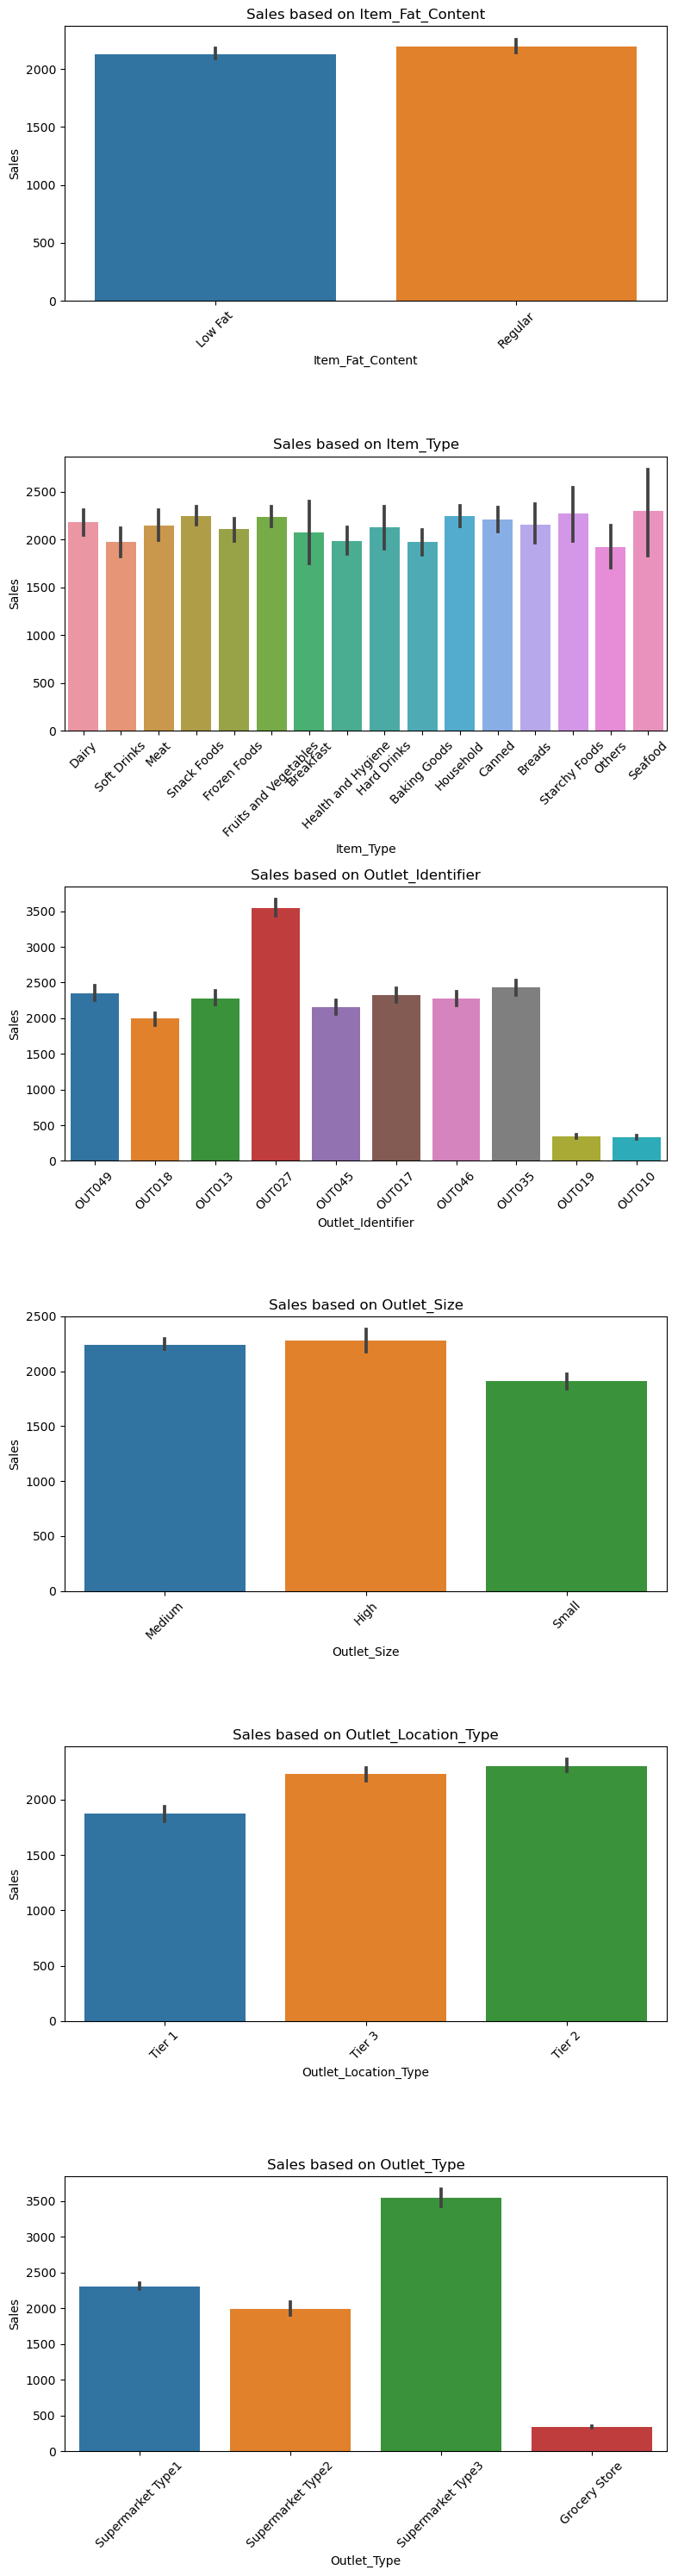

In [29]:
# BarPlot for Sales per Item_Type

# Create subplots
fig, axes = plt.subplots(len(categorical_variables) - 1, 1, figsize=(8, 30))
axes = axes.flatten()

# Iterate over categorical variables and create bar plots
for i, var in enumerate(categorical_variables[1:]):
    ax = sns.barplot(data=df, x=var, y='Item_Outlet_Sales', ax=axes[i])
    ax.set_title(f'Sales based on {var}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Set y-axis label
    ax.set_xlabel(var)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
Outlet_Size: Sells are moreven in Medium and High size Stores.
Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.
Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.

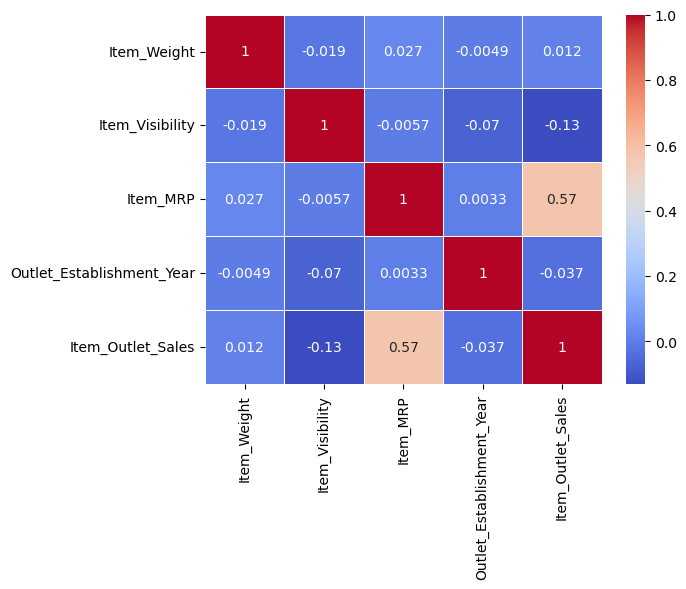

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

Item_Visibility has negativaly correlation so need to drop that column

In [31]:
df.drop('Item_Visibility', axis=1, inplace=True)

In [32]:
for var in df.columns:
    print(var,'\t',df[var].dtypes,'\t',df[var].nunique())
    print('--'*45)

Item_Identifier 	 object 	 1559
------------------------------------------------------------------------------------------
Item_Weight 	 float64 	 416
------------------------------------------------------------------------------------------
Item_Fat_Content 	 object 	 2
------------------------------------------------------------------------------------------
Item_Type 	 object 	 16
------------------------------------------------------------------------------------------
Item_MRP 	 float64 	 5700
------------------------------------------------------------------------------------------
Outlet_Identifier 	 object 	 10
------------------------------------------------------------------------------------------
Outlet_Establishment_Year 	 float64 	 9
------------------------------------------------------------------------------------------
Outlet_Size 	 object 	 3
------------------------------------------------------------------------------------------
Outlet_Location_Type 	 object 	 3
-

In [41]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2026,FDR32,6.780000,Regular,Food,229.5694,OUT013,1987.0,High,Tier 3,Supermarket Type1,3425.5410
8331,FDB57,20.250000,Regular,Food,220.6772,OUT046,1997.0,Small,Tier 1,Supermarket Type1,2223.7720
7371,FDC45,17.000000,Low Fat,Food,171.7106,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,1711.1060
6506,FDD29,12.150000,Low Fat,Food,252.7698,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,5834.4054
3733,DRB01,12.792854,Low Fat,Drinks,190.0530,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,569.2590
2302,FDP32,6.650000,Low Fat,Food,126.7678,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1907.5170
7699,NCY29,13.650000,Low Fat,Non-Consumable,56.8930,OUT046,1997.0,Small,Tier 1,Supermarket Type1,1188.4530
2275,FDQ33,13.350000,Low Fat,Food,149.3708,OUT035,2004.0,Small,Tier 2,Supermarket Type1,4514.1240
7857,NCW05,20.250000,Low Fat,Non-Consumable,108.8938,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,3644.5892
4694,FDK16,9.065000,Low Fat,Food,94.4094,OUT013,1987.0,High,Tier 3,Supermarket Type1,2856.2820


In [40]:
#There is a similarity betwwen Item_Identifier and Item_Type
#Item_Type has been changed according to that similarity
df['Item_Type'] = df['Item_Identifier'].str[:2]
df['Item_Type'] = df['Item_Type'].replace({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})

In [42]:
#As Item_Identifier has 1559 unique categorical and 
#Outlet_Identifier has 10 unique categorical values, those are not needed so dropping it
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [43]:
df.nunique()

Item_Weight                   416
Item_Fat_Content                2
Item_Type                       3
Item_MRP                     5700
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3242
dtype: int64

In [45]:
df.Item_Type.unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

In [46]:
# Mapping the categorical variables whoes having limited categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':0,'High':1,'Small':2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1':0,'Supermarket Type2':1,'Supermarket Type3':3,'Grocery Store':4})
df['Item_Type'] = df['Item_Type'].map({'Food':0,'Drinks':1,'Non-Consumable':2})

In [47]:
df.sample(20)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1674,17.000000,0,2,123.7730,2009.0,0,2,1,1231.7300
6254,15.700000,1,0,169.2790,2002.0,0,1,0,3735.1380
4617,12.100000,0,1,165.3526,1999.0,0,0,0,3453.5046
7611,15.000000,1,0,182.5266,2009.0,0,2,1,1290.9862
140,8.020000,0,2,154.5972,2004.0,2,1,0,1402.1748
8119,8.600000,0,2,91.8146,1999.0,0,0,0,2371.5796
4507,16.700000,1,0,146.6102,2009.0,0,2,1,2770.3938
3984,18.700000,0,0,85.3566,2009.0,0,2,1,591.8962
1338,12.792854,1,0,122.1098,1985.0,0,2,3,3374.2744
5292,8.000000,1,0,250.3092,1997.0,2,0,0,6502.2028


In [48]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7997 non-null   float64
 1   Item_Fat_Content           7997 non-null   int64  
 2   Item_Type                  7997 non-null   int64  
 3   Item_MRP                   7997 non-null   float64
 4   Outlet_Establishment_Year  7997 non-null   float64
 5   Outlet_Size                7997 non-null   int64  
 6   Outlet_Location_Type       7997 non-null   int64  
 7   Outlet_Type                7997 non-null   int64  
 8   Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 624.8 KB


In [49]:
#Seperating dependent and independent variables
y=df[['Item_Outlet_Sales']]
X=df.drop('Item_Outlet_Sales',axis=1)

In [50]:
#Train-Test splitting with resampled data
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

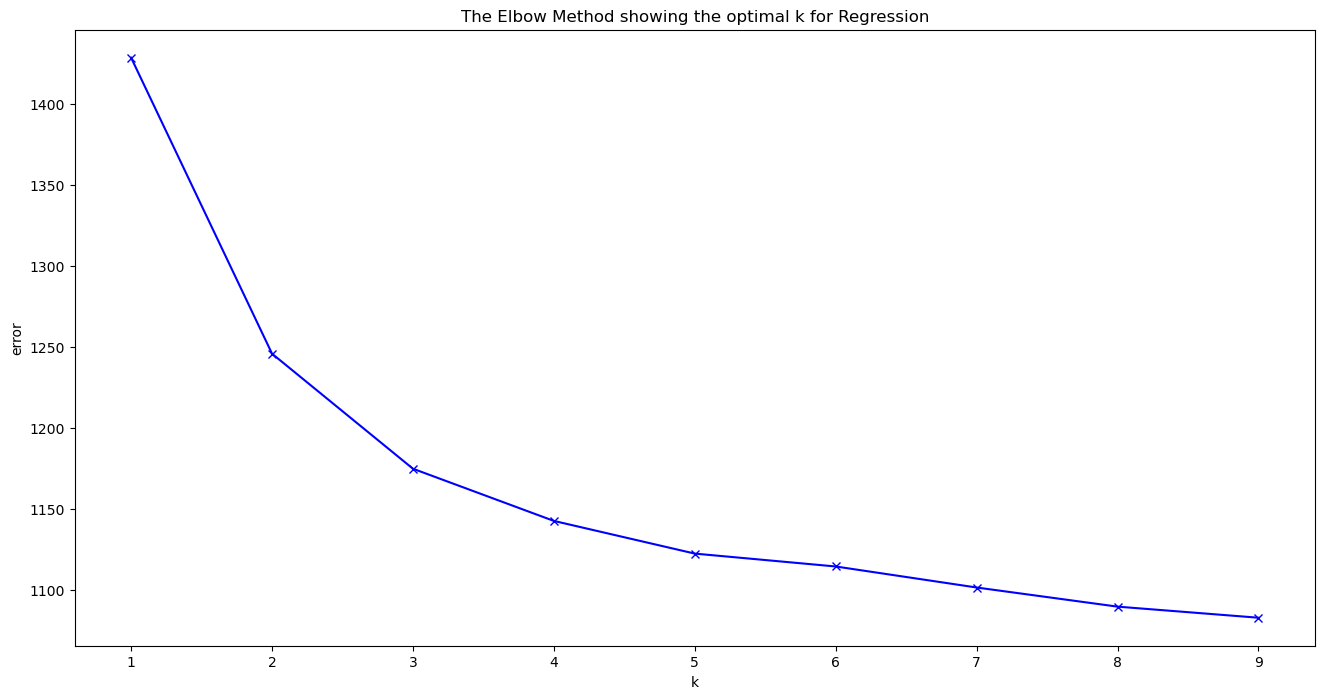

In [54]:
#Optimized value of k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

error = []

for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred_KNN)))

plt.figure(figsize=(16, 8))
plt.plot(range(1, 10), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k for Regression')
plt.show()


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create the KNN Regressor
k = 5  # You can adjust the number of neighbors (k) as needed
knn = KNeighborsRegressor(n_neighbors=k)

# Train the regressor
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 1260206.2615149317
Root Mean Squared Error (RMSE): 1122.589088453532


In [62]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
tree_reg = DecisionTreeRegressor()

# Train the regressor
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2224424.0096096774
Root Mean Squared Error (RMSE): 1491.4503041032501
